In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
!python scripts/data_clean.py

In [3]:
!python ./scripts/data_integration.py

In [6]:
!python ./scripts/check_integrity.py

8c4d462e9db5166f2e56e59fe2a3de1c56d6b93b278bbb9280a667e5e9d811d5
2fdc551ec38d346d3f3d9609f50710c85eedb9daea0e6d079a8249a12837920f
c2024080939ff712552681fcd3eb5e549b84a9aa2d51046bf84cef371154c96a


In [7]:
merged = pd.read_csv("./Data/merge_Data/merged_dataset.csv")

merged.shape

(923, 10)

In [8]:
merged.isna().sum()

State           0
County          0
Percent_COPD    0
Quartile        0
Year            0
Median AQI      0
Days Ozone      0
Days PM2.5      0
Days NO2        0
Days PM10       0
dtype: int64

In [9]:
merged.dtypes

State            object
County           object
Percent_COPD    float64
Quartile         object
Year              int64
Median AQI        int64
Days Ozone        int64
Days PM2.5        int64
Days NO2          int64
Days PM10         int64
dtype: object

In [10]:
merged.columns

Index(['State', 'County', 'Percent_COPD', 'Quartile', 'Year', 'Median AQI',
       'Days Ozone', 'Days PM2.5', 'Days NO2', 'Days PM10'],
      dtype='object')

In [11]:
merged[["Percent_COPD", "Median AQI", "Days PM2.5", "Days Ozone"]].corr()


,Percent_COPD,Median AQI,Days PM2.5,Days Ozone
Percent_COPD,1.000000,-0.096749,-0.050492,-0.032452
Median AQI,-0.096749,1.000000,0.230323,0.094543
Days PM2.5,-0.050492,0.230323,1.000000,-0.764048
Days Ozone,-0.032452,0.094543,-0.764048,1.000000


In [12]:
X = merged[["Median AQI"]]
X = sm.add_constant(X)
y = merged["Percent_COPD"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Percent_COPD   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     8.702
Date:                Thu, 20 Nov 2025   Prob (F-statistic):            0.00326
Time:                        22:10:26   Log-Likelihood:                -1609.5
No. Observations:                 923   AIC:                             3223.
Df Residuals:                     921   BIC:                             3233.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0262      0.179     39.247      0.0

In [13]:
pollutants = ["Median AQI", "Days Ozone", "Days PM2.5", "Days NO2", "Days PM10"]
corr_results = {}

for col in pollutants:
    corr = merged["Percent_COPD"].corr(merged[col])
    corr_results[col] = corr

corr_df = pd.DataFrame.from_dict(corr_results, orient="index", columns=["Correlation"])
print(corr_df.sort_values("Correlation", ascending=False))


            Correlation
Days PM10      0.029636
Days NO2      -0.011767
Days Ozone    -0.032452
Days PM2.5    -0.050492
Median AQI    -0.096749


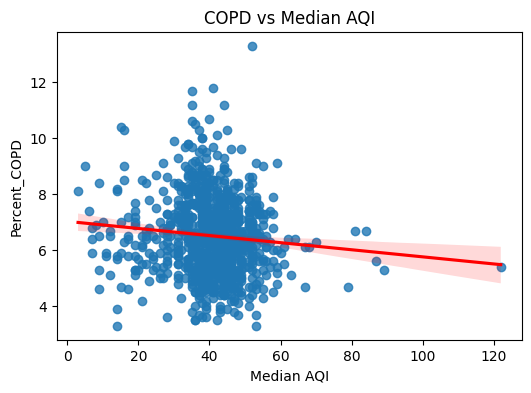

In [14]:
plt.figure(figsize = (6, 4))
sns.regplot(data = merged, x = "Median AQI", y = "Percent_COPD", line_kws = {"color": "red"})
plt.title("COPD vs Median AQI")
plt.show()

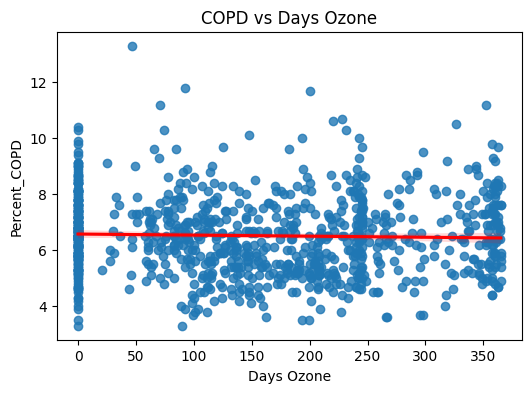

In [15]:
plt.figure(figsize = (6, 4))
sns.regplot(data = merged, x = "Days Ozone", y = "Percent_COPD", line_kws = {"color": "red"})
plt.title("COPD vs Days Ozone")
plt.show()

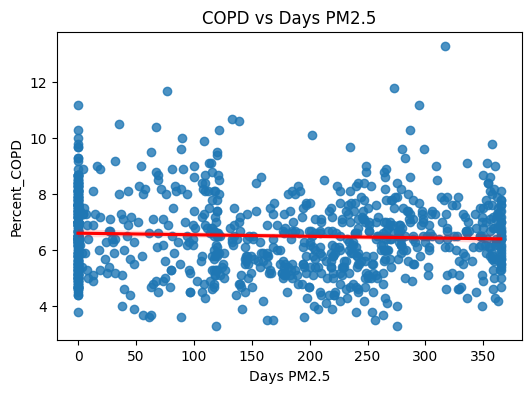

In [16]:
plt.figure(figsize = (6, 4))
sns.regplot(data = merged, x = "Days PM2.5", y = "Percent_COPD", line_kws = {"color": "red"})
plt.title("COPD vs Days PM2.5")
plt.show()

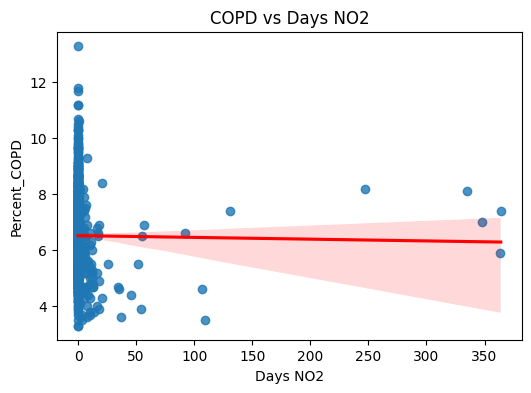

In [17]:
plt.figure(figsize = (6, 4))
sns.regplot(data = merged, x = "Days NO2", y = "Percent_COPD", line_kws = {"color": "red"})
plt.title("COPD vs Days NO2")
plt.show()

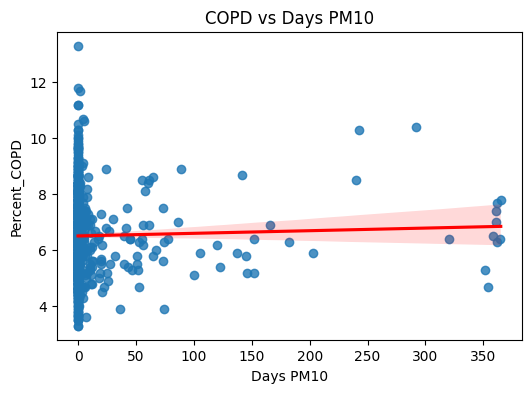

In [18]:
plt.figure(figsize = (6, 4))
sns.regplot(data = merged, x = "Days PM10", y = "Percent_COPD", line_kws = {"color": "red"})
plt.title("COPD vs Days PM10")
plt.show()